In [2]:
!pip install diffusers transformers accelerate


In [1]:
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:
import matplotlib.pyplot as plt
import torch

In [3]:
model = "stabilityai/stable-diffusion-3-medium-diffusers"
model1 = "dreamlike-art/dreamlike-photoreal-2.0"
model2 = "stabilityai/stable-diffusion-3.5-large-turbo"

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model1,torch_dtype=torch.float16, use_safetensor=True)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Keyword arguments {'use_safetensor': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
prompt="Create an illustration of a young woman in her early 20s with captivating emerald blue eyes and long, wavy chestnut brown hair that cascades down her back. Her expression is warm and kind, with a slight playful smile. She is wearing a flowing light blue dress adorned with delicate floral patterns and lace trim. The background is a serene meadow during golden hour, with sunlight filtering through tall grass and wildflowers swaying gently in the breeze. Make the scene soft and dreamy, emphasizing the glow of the sunlight and the natural colors of the setting."

In [13]:
image=pipe(prompt).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tall grass and wildflowers swaying gently in the breeze . make the scene soft and dreamy , emphasizing the glow of the sunlight and the natural colors of the setting .']


  0%|          | 0/50 [00:00<?, ?it/s]

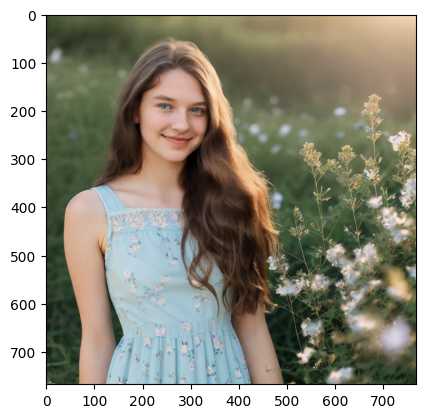

In [14]:
plt.imshow(image)

In [15]:
pipe2 = StableDiffusionPipeline.from_pretrained(model2,torch_dtype=torch.float16, use_safetensor=True)
pipe2 = pipe.to("cuda")

GatedRepoError: 401 Client Error. (Request ID: Root=1-673b3e0b-2665b7731b50f4821cf36cd7;8efa8ba0-3a2b-434c-b673-5c2a6644a170)

Cannot access gated repo for url https://huggingface.co/stabilityai/stable-diffusion-3.5-large-turbo/resolve/main/model_index.json.
Access to model stabilityai/stable-diffusion-3.5-large-turbo is restricted. You must have access to it and be authenticated to access it. Please log in.

In [22]:
!pip install -U "huggingface_hub[cli]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 5.9 MB/s eta 0:00:00


In [25]:
!!huggingface-cli download --help

['usage: huggingface-cli <command> [<args>] download [-h] [--repo-type {model,dataset,space}]',
 '                                                   [--revision REVISION] [--include [INCLUDE ...]]',
 '                                                   [--exclude [EXCLUDE ...]]',
 '                                                   [--cache-dir CACHE_DIR] [--local-dir LOCAL_DIR]',
 '                                                   [--local-dir-use-symlinks {auto,True,False}]',
 '                                                   [--force-download] [--resume-download]',
 '                                                   [--token TOKEN] [--quiet]',
 '                                                   [--max-workers MAX_WORKERS]',
 '                                                   repo_id [filenames ...]',
 '',
 'positional arguments:',
 '  repo_id               ID of the repo to download from (e.g. `username/repo-name`).',
 '  filenames             Files to download (e.g. `config.js

In [29]:
huggingface-cli

NameError: name 'huggingface' is not defined

In [27]:
import torch
from diffusers import StableDiffusion3Pipeline


pipe2 = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large-turbo", torch_dtype=torch.bfloat16)
pipe2 = pipe.to("cuda")

image = pipe2(
    "Create an illustration of a young woman in her early 20s with captivating emerald blue eyes and long, wavy chestnut brown hair that cascades down her back. Her expression is warm and kind, with a slight playful smile. She is wearing a flowing light blue dress adorned with delicate floral patterns and lace trim. The background is a serene meadow during golden hour, with sunlight filtering through tall grass and wildflowers swaying gently in the breeze. Make the scene soft and dreamy, emphasizing the glow of the sunlight and the natural colors of the setting.",
    num_inference_steps=4,
    guidance_scale=0.0,
).images[0]
image.save("capybara.png")


GatedRepoError: 401 Client Error. (Request ID: Root=1-673b4104-7ab0c828149924ab23a64b38;3029518b-3b75-48af-8bc9-2a24026c8727)

Cannot access gated repo for url https://huggingface.co/stabilityai/stable-diffusion-3.5-large-turbo/resolve/main/model_index.json.
Access to model stabilityai/stable-diffusion-3.5-large-turbo is restricted. You must have access to it and be authenticated to access it. Please log in.

In [31]:
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion model
pipeline = StableDiffusionPipeline.from_pretrained("dreamlike-art/dreamlike-photoreal-2.0")

# Custom parameters
prompt = "Create an illustration of a young woman in her early 20s with captivating emerald green eyes and long, wavy chestnut brown hair that cascades down her back. Her expression is warm and kind, with a slight playful smile. She is wearing a flowing light blue dress adorned with delicate floral patterns and lace trim. The background is a serene meadow during golden hour, with sunlight filtering through tall grass and wildflowers swaying gently in the breeze. Make the scene soft and dreamy, emphasizing the glow of the sunlight and the natural colors of the setting."
negative_prompt = "blurry, dark, distorted, unrealistic"
num_inference_steps = 50
height = 768
width = 768
num_images_per_prompt = 6

# Generate images
images = pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width,
    num_images_per_prompt=num_images_per_prompt,
).images

# Display or save the images
for idx, image in enumerate(images):
    image.show()  # To display the image
    image.save(f"generated_image_{idx+1}.png")  # To save the image to disk


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tall grass and wildflowers swaying gently in the breeze . make the scene soft and dreamy , emphasizing the glow of the sunlight and the natural colors of the setting .']


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 